In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## load image

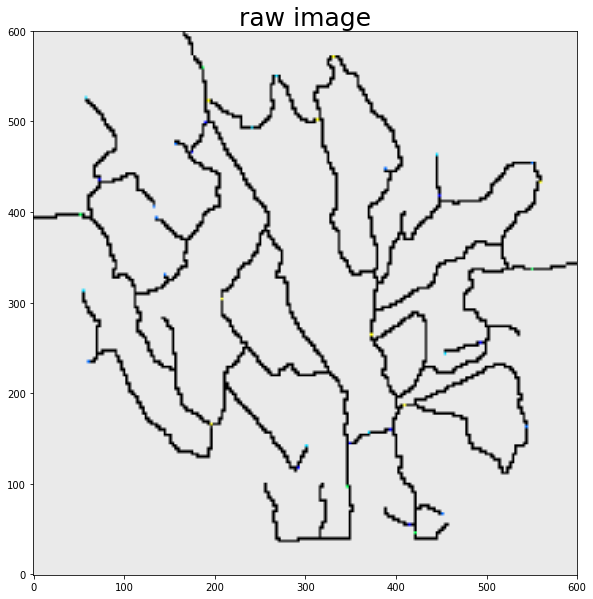

In [3]:
plt.figure(figsize=(20,10))
img=cv2.imread("data/Map.bmp")
img1 = cv2.resize(img, (600, 600)) 
img1 = cv2.flip(img1, 0) #flip the image


#print(blured.shape)
plt.imshow(img1,cmap='Greys',origin='lower')
plt.title('raw image',fontsize = 25)
plt.show()

In [ ]:
## visualize the map

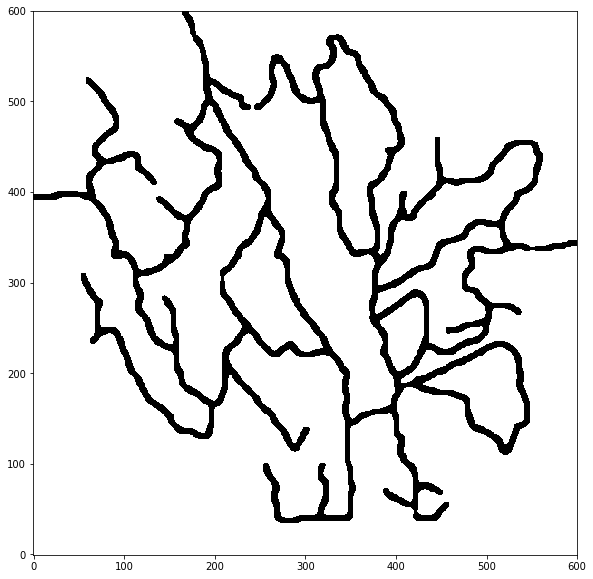

True

In [4]:
#visualize the map
blured=cv2.blur(img1,(8,8))#guassien blur
imgray = cv2.cvtColor(blured,cv2.COLOR_BGR2GRAY)# convert rgb image to gray image
imgray=cv2.bitwise_not(imgray)
ret,im_fixed=cv2.threshold(imgray,80,255,cv2.THRESH_BINARY)#convert gray image to binary image

plt.figure(figsize=(20,10))
plt.imshow(im_fixed,cmap='Greys',origin='lower')
#plt.title('raw image',fontsize = 25)
plt.show()
cv2.bitwise_not(im_fixed,im_fixed)
cv2.imwrite("data/NiceMap.jpg",im_fixed)

In [5]:
# load bird position
df = pd.read_csv('data/AllBirdsv4.csv',encoding='ISO-8859-1')
position = []
name=[]
X=[]
Y=[]
position_name=[]
l=[]
for i in range(df.shape[0]):
    try:
        position.append([int(df.X[i]), int(df.Y[i])])
        X.append(int(df.X[i]))
        Y.append(int(df.Y[i]))
        position_name.append([int(df.X[i]), int(df.Y[i]),df.English_name[i]])
        if df.English_name[i] not in name:
            name.append(df.English_name[i])
            if (i !=0):
                X.pop()
                Y.pop()
                l.append([X,Y,df.English_name[i-1]])
                X=[int(df.X[i])]
                Y=[int(df.Y[i])]
    except:
        pass


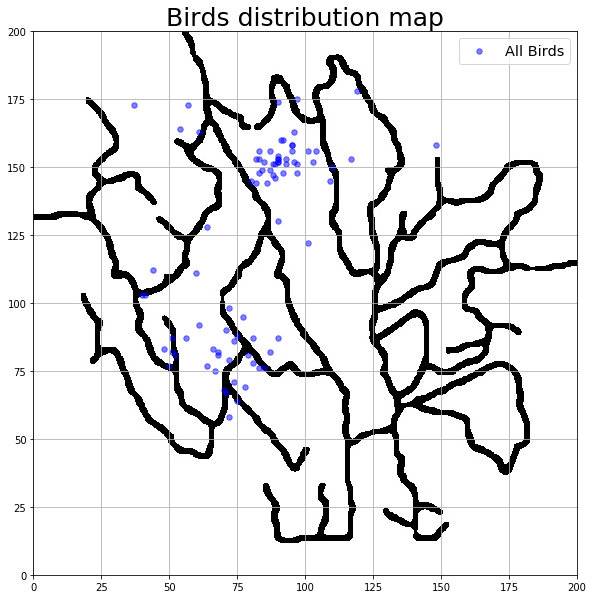

In [6]:
img2=cv2.imread("data/NiceMap.jpg")
#img3 = cv2.flip(img2, 0) #flip the image
fig, ax = plt.subplots(figsize=(10,10))

#ax.imshow(img2,cmap=plt.cm.Reds, interpolation='none', extent=[0,200,0,200])
#ax.set_aspect(2)
#plt.figure(figsize=(20,10))
#for i in position:
plt.scatter(X,Y, s=30, alpha=0.5,c ='b' , marker = 'o',label = 'All Birds') #if i == position[0] else "")
ax.imshow(img2,cmap='Greys', origin = 'lower',extent=[0,200,0,200])
plt.grid()
plt.title('Birds distribution map',fontsize = 25)
plt.legend(loc =1, fontsize = 'x-large')
plt.show()

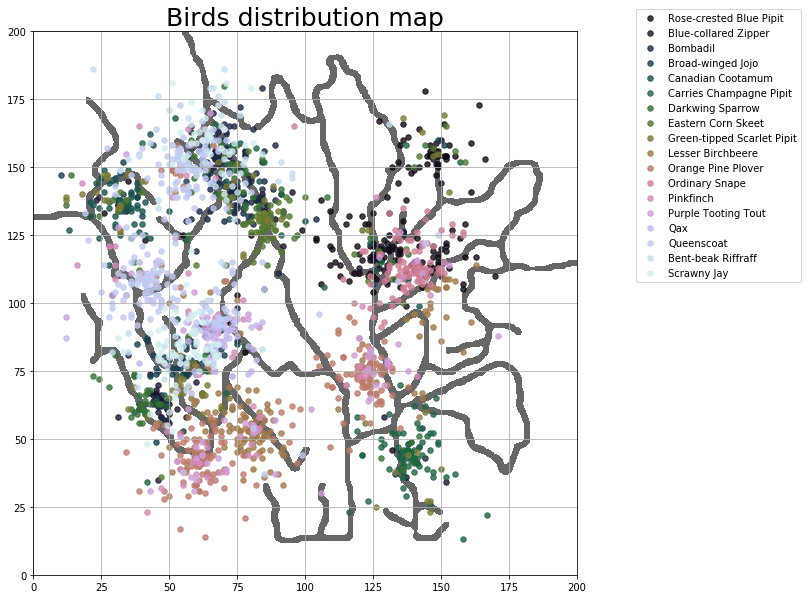

In [11]:
import seaborn as sns
N=len(name)
fig, ax = plt.subplots(figsize=(10,10))
colour_choosen=sns.color_palette("cubehelix", N)
k=0
for i in l:
    ax.scatter(i[0],i[1],s=30, alpha=0.8,color = colour_choosen[k], marker = 'o',label=i[2])
    k=k+1
ax.imshow(img2,cmap='Greys', origin = 'lower',extent=[0,200,0,200],alpha=0.6)
plt.title('Birds distribution map',fontsize = 25)

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()


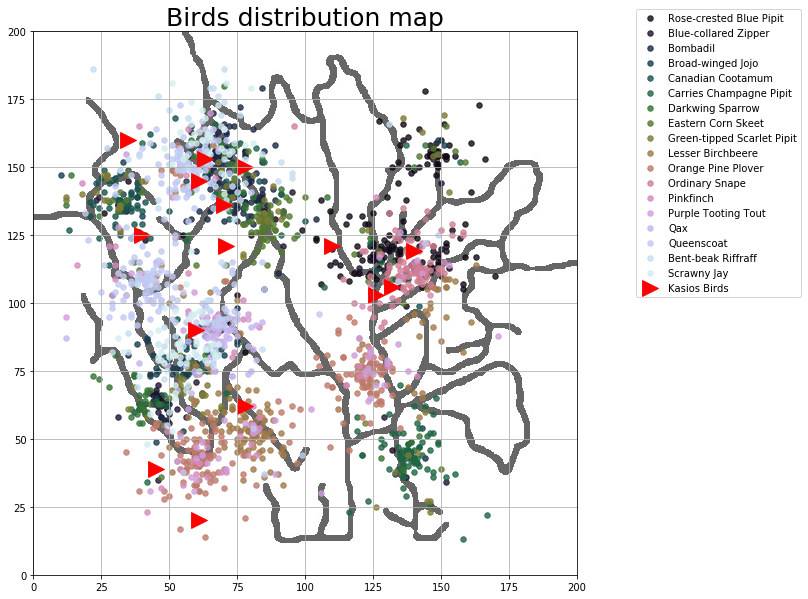

In [22]:
#Birds from Kasios
kasios = pd.read_csv('data/Test Birds Location.csv',encoding='ISO-8859-1')
kasios.columns = kasios.columns.str.lstrip() #remove space in label

N=len(name)
fig, ax = plt.subplots(figsize=(10,10))
colour_choosen=sns.color_palette("cubehelix", N)
k=0
for i in l:
    ax.scatter(i[0],i[1],s=30, alpha=0.8,color = colour_choosen[k], marker = 'o',label=i[2])
    k=k+1
for i in range(15):
    ax.scatter(kasios.X[i], kasios.Y[i], s=250, color = 'red', marker = '>',label = 'Kasios Birds' if i == 0 else "")
ax.imshow(img2,cmap='Greys', origin = 'lower',extent=[0,200,0,200],alpha=0.6)
plt.title('Birds distribution map',fontsize = 25)

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid()
plt.show()
